 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><ul class="toc-item"><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Show-class-values-for-race" data-toc-modified-id="Show-class-values-for-race-0.0.1">Show class values for race</a></span></li><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Replace-categorical-column-with-numbers" data-toc-modified-id="Replace-categorical-column-with-numbers-0.0.2">Replace categorical column with numbers</a></span></li></ul><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Visualizing-categorical-data" data-toc-modified-id="Visualizing-categorical-data-0.1">Visualizing categorical data</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Value-counts-for-all-categorical-features" data-toc-modified-id="Value-counts-for-all-categorical-features-0.1.1">Value counts for all categorical features</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Modifying-the-dataset-to-create-binary-classification-problem" data-toc-modified-id="Modifying-the-dataset-to-create-binary-classification-problem-0.2">Modifying the dataset to create binary classification problem</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Dropping-police-column" data-toc-modified-id="Dropping-police-column-0.2.1">Dropping police column</a></span></li><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Dropping-rows-with-non-white/non-black-victims" data-toc-modified-id="Dropping-rows-with-non-white/non-black-victims-0.2.2">Dropping rows with non-white/non-black victims</a></span></li><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Creating-training-and-testing-set" data-toc-modified-id="Creating-training-and-testing-set-0.2.3">Creating training and testing set</a></span></li><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Training-a-decision-tree" data-toc-modified-id="Training-a-decision-tree-0.2.4">Training a decision tree</a></span></li></ul></li></ul></ul></div>

The goal here is to create a model using a decision tree on dataset. Decision trees are amazing tools to easily interpret a model since they split the data based on on certain thresholds for each column. They are easy to train with few hyper-parameters, easy to interpret, they do have a major drawback being that they tend to overfit the data. Despite this, as a first example of a machine learning algorithm, decision trees are intuitive and can give you valuable insight about your which can be used to build better models. 
 

Introduction to the dataset
I will use the sklearn algorithm to train a decision tree. As you will see many more lines are spent preparing the data for training rather than the actual training process (which really is just one line). The data set we are going to use can be found here -https://data.world/azel/gun-deaths-in-america. This data set is part of five thirty eight's gun deaths in America project. It contain bunch of information of victims of gun violence. Each row of the dataset contains - the year and month of the shooting, the intent of the shooter, whether cops were at the scene or not, the gender, age race and education level of the victim and finally the place where the shooting happened. There is specific information about whether the victim was hispanic or not. We take this dataset and boil it down to predicting just one of two classes- were the victims of the shooting white or black? Why ignore other victim class ? (There are 5 in total), firstly, the rest of the classes, as you will see make up less than 11% of the dataset, secondly the goal is to build a simple binary classification model, for those who are interested, I would love to work with you and build a more multi classification model for the whole dataset. 

The plan for the analysis is the following- 
- I will first read and display the dataset to see what are the relevant columns 
- We will have to encode certain categorical variable so we can run the decision tree on them
- We will plot some of these categorical variables to see how skewed they are
- We will drop rows containing non white and non black victims 
- Create test and train sets
- Train the decision tree 
- Interpret results of the tree- I will leave that as set of the question so that the interested reader can further get involved with understanding the what the model represents

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing 
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  


In [2]:
location ='D:/datasets/fivethirtyEight-gun-violence-data.csv'

In [3]:
#load dataset
gun_violence_dataset_original= pd.read_csv(location)

# remove rows with NA 
gun_violence_dataset_original = gun_violence_dataset_original.dropna()

In [4]:
# show head 
gun_violence_dataset_original.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


### Show class values for race 

In [5]:
pd.value_counts(gun_violence_dataset_original['race'])

White                             65504
Black                             22922
Hispanic                           8734
Asian/Pacific Islander             1294
Native American/Native Alaskan      889
Name: race, dtype: int64

### Replace categorical column with numbers 

In [6]:
gun_violence_dataset = gun_violence_dataset_original.copy()


In [7]:
columns_to_encode =  ['intent','sex','place']
le = preprocessing.LabelEncoder()

for i  in range(len(columns_to_encode)): 
    column =columns_to_encode[i]
    gun_violence_dataset[column] = le.fit_transform(gun_violence_dataset[column])
    

In [8]:
gun_violence_dataset.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,2,0,1,34.0,Asian/Pacific Islander,100,1,4.0
1,2,2012,1,2,0,0,21.0,White,100,8,3.0
2,3,2012,1,2,0,1,60.0,White,100,3,4.0
3,4,2012,2,2,0,1,64.0,White,100,1,4.0
4,5,2012,2,2,0,1,31.0,White,100,3,2.0


## Visualizing categorical data 
### Value counts for all categorical features
We can do this since we have very few columns 

In [9]:
def val_count_to_percent(column): 
    return pd.value_counts(column)/(pd.value_counts(column).sum())*100 

def val_count_to_percent_plot(column, fig_width=10, fig_height=10): 
    height = np.array(val_count_to_percent(column).values)
  
    plt.figure(figsize=(fig_width,fig_height))
    plt.bar(range(height.shape[0]),height)
    plt.xticks(range(height.shape[0]),np.array(val_count_to_percent(column).index), fontsize=12 )
    plt.ylabel('Percent of data', fontsize=17)
    plt.xlabel('Feature values',fontsize=17)
    plt.title('column: '+column.name , fontsize= 17)
    plt.show()


Suicide         63.579719
Homicide        33.973204
Accidental       1.635747
Undetermined     0.811330
Name: intent, dtype: float64


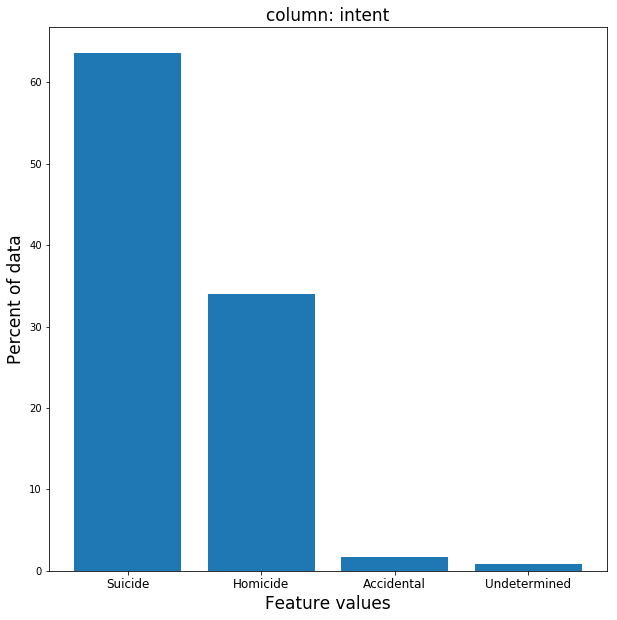

'intent'

In [10]:
print(val_count_to_percent(gun_violence_dataset_original['intent']))
val_count_to_percent_plot(gun_violence_dataset_original.intent)
gun_violence_dataset_original.intent.name

0    99.980874
1     0.019126
Name: police, dtype: float64


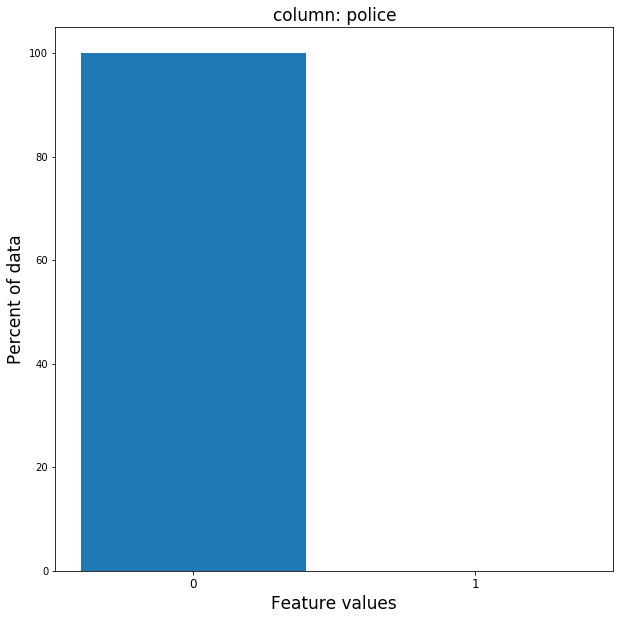

In [11]:
print(val_count_to_percent(gun_violence_dataset_original['police']))
val_count_to_percent_plot(gun_violence_dataset_original['police'])

M    85.541004
F    14.458996
Name: sex, dtype: float64


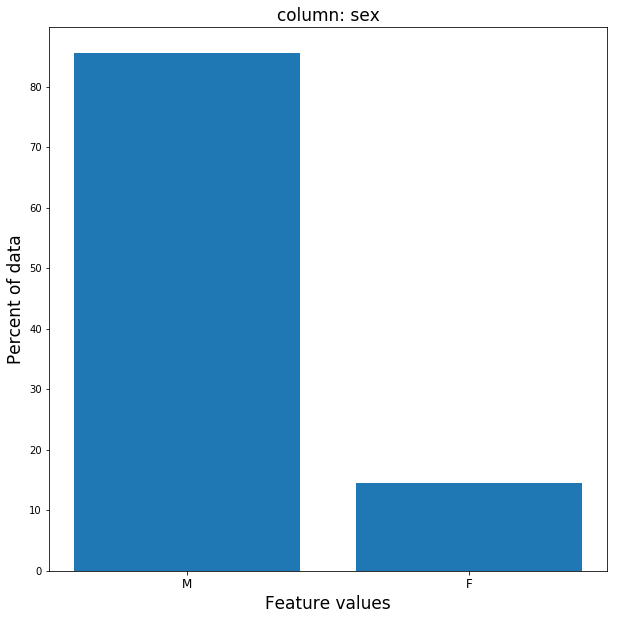

In [12]:
print(val_count_to_percent(gun_violence_dataset_original['sex']))
val_count_to_percent_plot(gun_violence_dataset_original['sex'])

2.0    42.537471
1.0    21.589845
3.0    21.571726
4.0    12.964175
5.0     1.336783
Name: education, dtype: float64


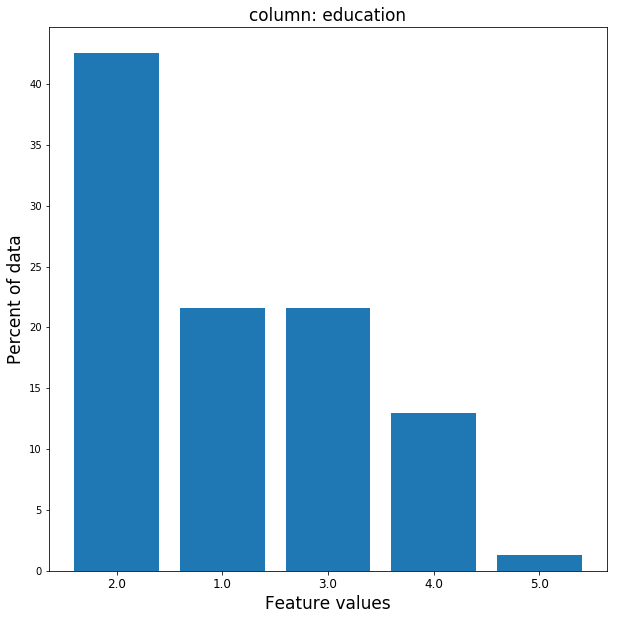

In [13]:
print(val_count_to_percent(gun_violence_dataset_original['education']))
val_count_to_percent_plot(gun_violence_dataset_original['education'])

Home                       60.842737
Other specified            13.829862
Street                     11.221727
Other unspecified           8.915575
Trade/service area          3.461744
School/instiution           0.674431
Farm                        0.471095
Industrial/construction     0.249640
Residential institution     0.204343
Sports                      0.128847
Name: place, dtype: float64


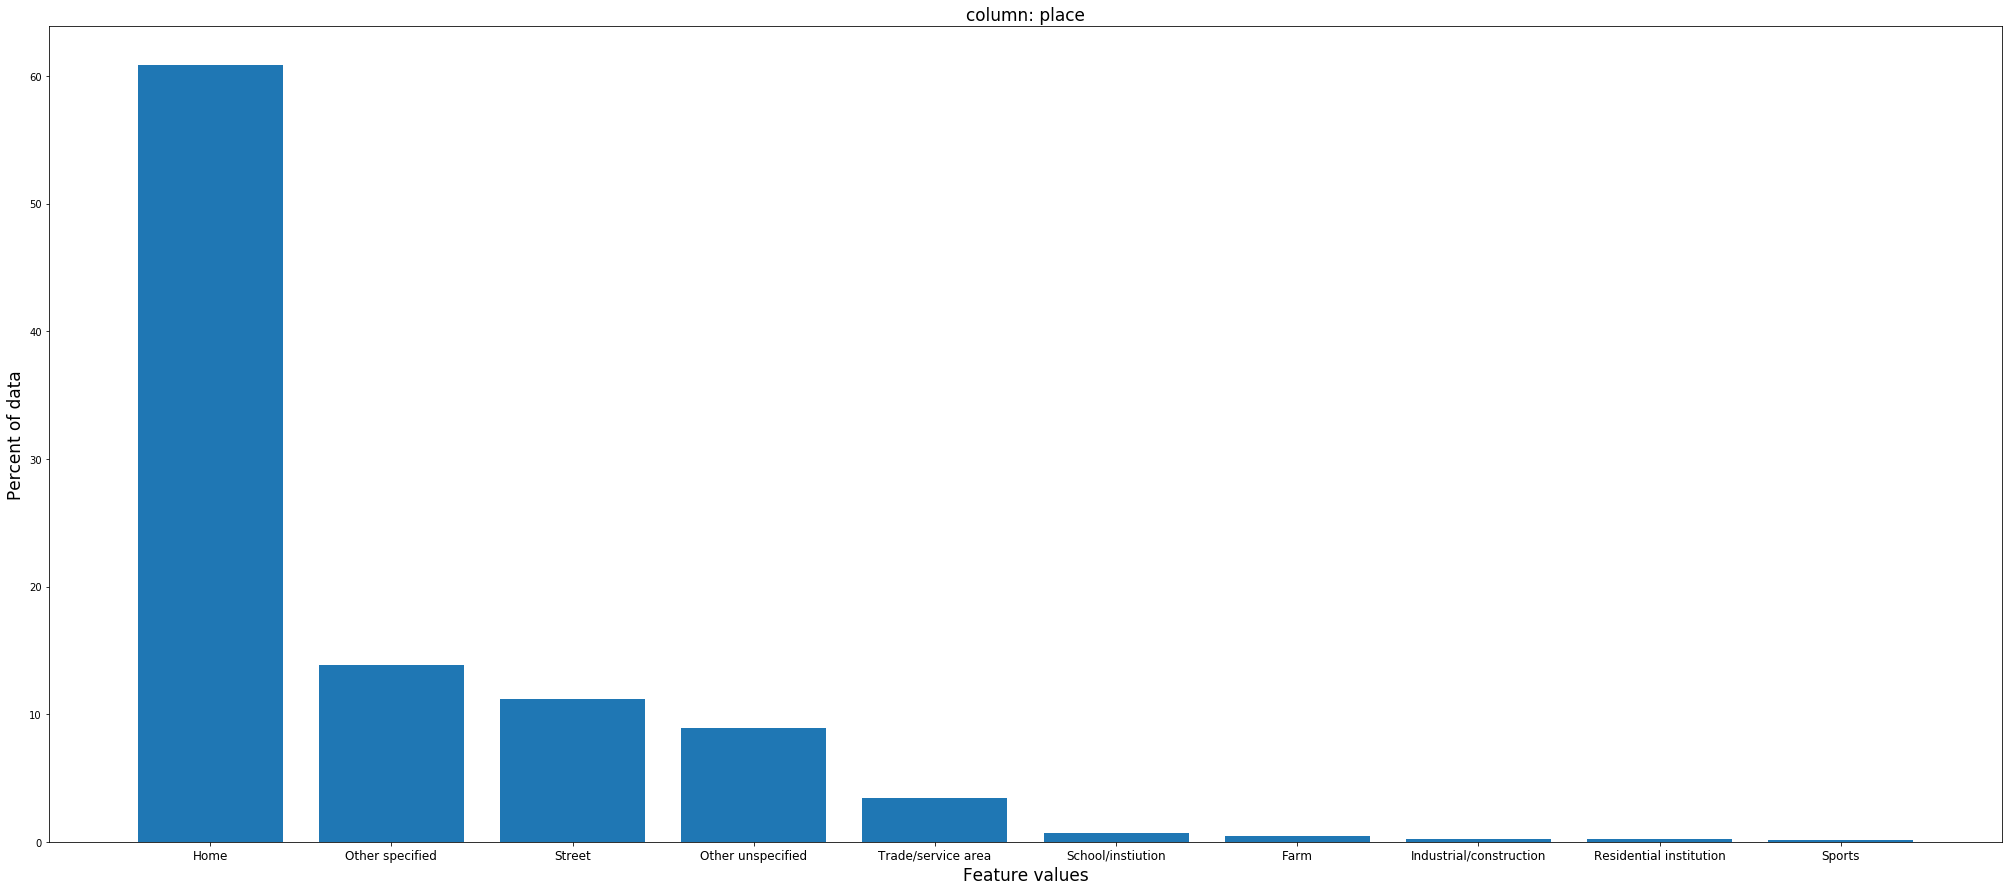

In [14]:
print(val_count_to_percent(gun_violence_dataset_original['place']))
val_count_to_percent_plot(gun_violence_dataset_original['place'],fig_width=35 , fig_height=15)

7     8.905509
8     8.700160
5     8.594466
6     8.588426
9     8.453540
4     8.383077
12    8.359925
10    8.350865
3     8.221012
1     8.206919
11    8.183767
2     7.052334
Name: month, dtype: float64


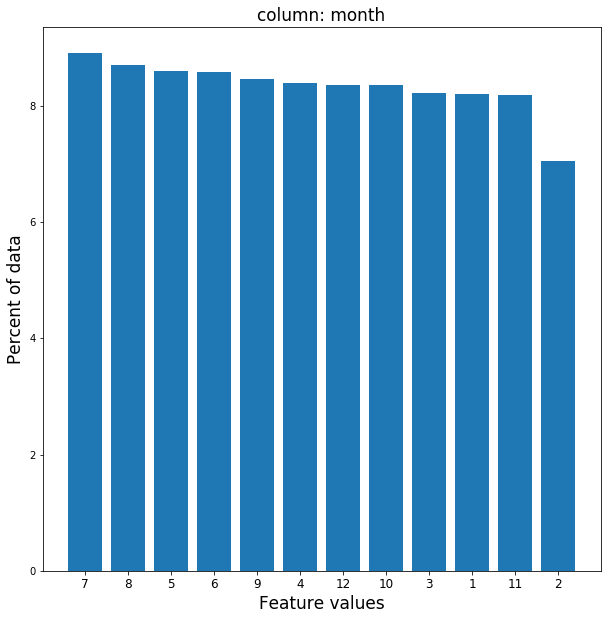

In [15]:
print(val_count_to_percent(gun_violence_dataset_original['month']))
val_count_to_percent_plot(gun_violence_dataset_original['month'])

2013    33.365209
2014    33.344071
2012    33.290720
Name: year, dtype: float64


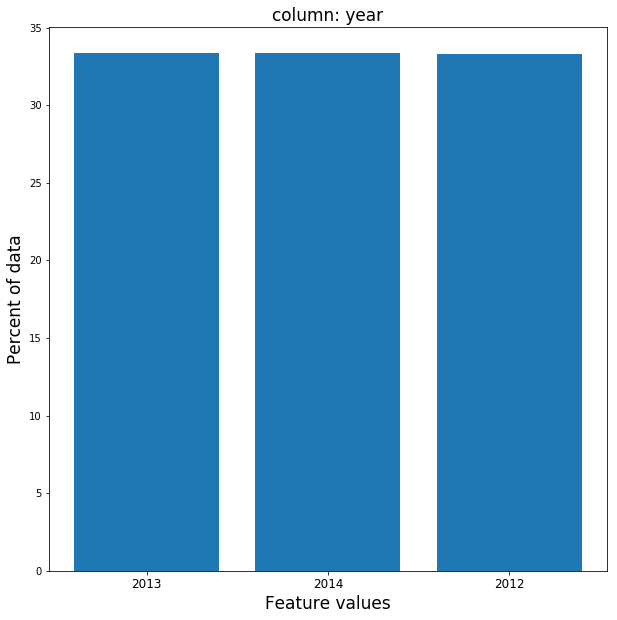

In [16]:
print(val_count_to_percent(gun_violence_dataset_original['year']))
val_count_to_percent_plot(gun_violence_dataset_original['year'])

From the above we can basically drop the police column since it will no contribute to any classification. One can keep it as well, shouldn't really make much of a difference.


## Modifying the dataset to create binary classification problem
### Dropping police column 


In [17]:
# dropping the police column
gun_violence_dataset = gun_violence_dataset.drop(['police'], axis=1)

gun_violence_dataset_org_moded =gun_violence_dataset_original.copy()
gun_violence_dataset_org_moded = gun_violence_dataset_org_moded.drop(['police'], axis=1)

# no police column 
gun_violence_dataset_org_moded.head()

,Unnamed: 0,year,month,intent,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,M,60.0,White,100,Other specified,4.0
3,4,2012,2,Suicide,M,64.0,White,100,Home,4.0
4,5,2012,2,Suicide,M,31.0,White,100,Other specified,2.0


### Dropping rows with non-white/non-black victims

In [18]:
drop_rows = np.where((gun_violence_dataset['race']=='Hispanic') | (gun_violence_dataset['race']=='Asian/Pacific Islander')
                                    |(gun_violence_dataset['race']=='Asian/Pacific Islander') 
         | (gun_violence_dataset['race']=='Native American/Native Alaskan') )



In [19]:
gun_violence_dataset.drop(gun_violence_dataset.index[list(drop_rows[0])], inplace=True)
gun_violence_dataset_org_moded.drop(gun_violence_dataset_org_moded.index[list(drop_rows[0])], inplace=True)


In [20]:
# so we have elimated all other class values other than white and black
np.unique(gun_violence_dataset['race'])


array(['Black', 'White'], dtype=object)

In [21]:
# must not forget to label encode the race category as well
gun_violence_dataset['race'] = le.fit_transform(gun_violence_dataset['race'])
gun_violence_dataset.head()

,Unnamed: 0,year,month,intent,sex,age,race,hispanic,place,education
1,2,2012,1,2,0,21.0,1,100,8,3.0
2,3,2012,1,2,1,60.0,1,100,3,4.0
3,4,2012,2,2,1,64.0,1,100,1,4.0
4,5,2012,2,2,1,31.0,1,100,3,2.0
6,7,2012,2,3,1,48.0,1,100,1,2.0


### Creating training and testing set 
I can ofcourse manually create these by using iloc or just numpy but I will use the sklearn.model_selection

In [22]:
train_X, test_X = model_selection.train_test_split(gun_violence_dataset,test_size=0.3,random_state= 1)

In [23]:
train_y = train_X['race']
train_X = train_X.drop(['race'], axis=1)

test_y = test_X['race']
test_X = test_X.drop(['race'], axis=1)


### Training a decision tree 


In [39]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth = 8,
                                  min_samples_leaf = 100)

clf = clf.fit(train_X, train_y)
y_preds = clf.predict(test_X)


In [40]:
# calculate the accuracy 
print('accuracy: ', accuracy_score(test_y,y_preds))


accuracy:  0.878995778046


Since we are essentially dealing with a binary classification, we can use recall and precision scores as well. As we see we get fairly high values

In [41]:

print('recall: ', recall_score(test_y,y_preds))   # how many pertinent values are selected from the 
print('precision: ', precision_score(test_y,y_preds))


recall:  0.924864919971
precision:  0.912676056338


Visualize the decision tree 

In [42]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
img_object = Image(graph.write_png('decisiontree.png'))
